In [1]:
#packages
import tensorflow as tf
tf.random.set_seed(25)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import pandas as pd
import re
from numpy import array
import numpy as np
data = pd.read_csv('Downloads/train-io.txt', sep=" ", header=None)
from sklearn.preprocessing import StandardScaler
#data = data[0:60000]
#import tensorflow as tf

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.830433,1.494298,-2.141080,-2.155460,0.270127,-0.200620,0.093839,1.171075,1.403914,1.396813,-1.544217,1.676625,0
1,-1.408457,-2.556497,2.616034,3.000666,1.154949,0.288982,-0.404475,-3.067904,-0.783279,-0.588727,4.597042,-0.110411,1
2,1.760458,4.608794,-0.142573,1.472204,-3.849782,1.473854,-1.868692,-0.640403,0.538785,2.146118,3.052427,0.949428,1
3,-1.731262,0.231366,2.911554,0.163478,1.402251,-1.244460,0.827515,-2.875059,-0.323246,0.520745,-0.205174,-1.499808,1
4,1.333824,-1.561848,2.408792,0.433006,0.477863,-1.966526,1.684337,-1.867530,2.521149,-3.183390,5.744132,-1.597498,0


In [3]:
#target=data[12]

In [4]:
#del data[12]

In [5]:
#data.shape

In [6]:
neg, pos = np.bincount(data[12])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 300000
    Positive: 161077 (53.69% of total)



In [7]:
from sklearn.model_selection import train_test_split
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(data, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop(12))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop(12))
test_labels = np.array(test_df.pop(12))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [8]:
#scaler = StandardScaler()
#train_features = scaler.fit_transform(train_features)

#val_features = scaler.transform(val_features)
#test_features = scaler.transform(test_features)

#train_features = np.clip(train_features, -5, 5)
#val_features = np.clip(val_features, -5, 5)
#test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (192000,)
Validation labels shape: (48000,)
Test labels shape: (60000,)
Training features shape: (192000, 12)
Validation features shape: (48000, 12)
Test features shape: (60000, 12)


In [9]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(12,)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [11]:
tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)
model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),loss=keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.BinaryAccuracy()])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model.fit(train_features, train_labels, epochs=100, batch_size=20, validation_data=(val_features, val_labels), callbacks=[early_stopping])
#test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/100
9600/9600 [==============================] - 43s 4ms/step - loss: 0.6791 - binary_accuracy: 0.5658 - val_loss: 0.6615 - val_binary_accuracy: 0.6026
Epoch 2/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.6383 - binary_accuracy: 0.6320 - val_loss: 0.6057 - val_binary_accuracy: 0.6647
Epoch 3/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.5886 - binary_accuracy: 0.6797 - val_loss: 0.5708 - val_binary_accuracy: 0.6944
Epoch 4/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.5669 - binary_accuracy: 0.6976 - val_loss: 0.5534 - val_binary_accuracy: 0.7085
Epoch 5/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.5457 - binary_accuracy: 0.7181 - val_loss: 0.5361 - val_binary_accuracy: 0.7274
Epoch 6/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.5276 - binary_accuracy: 0.7334 - val_loss: 0.5189 - val_binary_accuracy: 0.7422
Epoch 7/100
9600/9600 [=================

Epoch 52/100
9600/9600 [==============================] - 28s 3ms/step - loss: 0.2025 - binary_accuracy: 0.9089 - val_loss: 0.2159 - val_binary_accuracy: 0.9019
Epoch 53/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.2017 - binary_accuracy: 0.9090 - val_loss: 0.2030 - val_binary_accuracy: 0.9074
Epoch 54/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.2002 - binary_accuracy: 0.9096 - val_loss: 0.2056 - val_binary_accuracy: 0.9075
Epoch 55/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.1997 - binary_accuracy: 0.9102 - val_loss: 0.2154 - val_binary_accuracy: 0.9004
Epoch 56/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.1988 - binary_accuracy: 0.9097 - val_loss: 0.2144 - val_binary_accuracy: 0.9039
Epoch 57/100
9600/9600 [==============================] - 29s 3ms/step - loss: 0.1979 - binary_accuracy: 0.9106 - val_loss: 0.2021 - val_binary_accuracy: 0.9076
Epoch 00057: early stopping


In [12]:
from sklearn.metrics import roc_curve                                                                                                                                                                     
y_pred_keras = model.predict(train_features).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(train_labels, y_pred_keras)

In [13]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

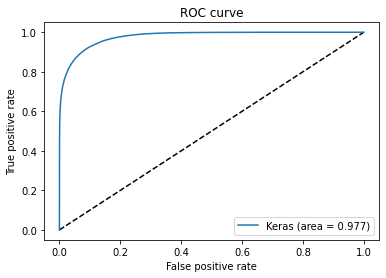

In [14]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [15]:
train_predictions_baseline = model.predict(train_features, batch_size=20)
test_predictions_baseline = model.predict(test_features, batch_size=20)

In [16]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('True Negatives: ', cm[0][0])
  print('False Positives: ', cm[0][1])
  print('False Negatives: ', cm[1][0])
  print('True Positives: ', cm[1][1])
  print('Total: ', np.sum(cm[1]))

loss :  0.20652958750724792
binary_accuracy :  0.9065166711807251

True Negatives:  25412
False Positives:  2481
False Negatives:  3128
True Positives:  28979
Total:  32107


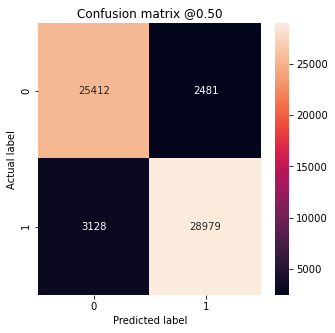

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=20, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [18]:
df = pd.read_csv('Downloads/test-in.txt', sep=" ", header=None)

In [19]:
ynew=(model.predict(df) > 0.5).astype("int32")

In [20]:
print(ynew)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [21]:
unique, counts = np.unique(ynew, return_counts=True)
dict(zip(unique, counts))

{0: 4759, 1: 5241}

In [22]:
model.save('my_model.h5')

In [23]:
#70 #72 #81 #25
with open('test-out.txt', 'w') as file:
    for n in ynew:
        file.write("%i\n" % n)

In [24]:
from sklearn.metrics import average_precision_score
y_pred_keras = model.predict(train_features).ravel()
average_precision = average_precision_score(train_labels, y_pred_keras)
print(average_precision)

0.9809428751577044


In [25]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(train_labels, y_pred_keras)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9809427872938199


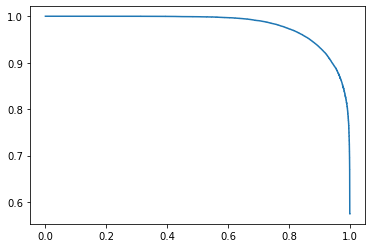

In [26]:
plt.plot(recall, precision)
plt.show()